<a href="https://colab.research.google.com/github/ele9996/Heart-failure-clinical-records-analysis/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Import useful libraries


In [197]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import random as rand

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn import svm
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from numpy import mean

#np.random.seed(123)

##Defining metrics for conclusion table

In [162]:
acc_original=[0,0,0,0]
acc_smote=[0,0,0,0]
f1_original=[0,0,0,0]
f1_smote=[0,0,0,0]
f1_original_cv=[0,0,0,0]
f1_smote_cv=[0,0,0,0]
acc_original_cv=[0,0,0,0]
acc_smote_cv=[0,0,0,0]

#Heart failure data analysis

The goal of the project is to try to predict if a patient with heart failure is likely to survive or not given certain medical records regarding clinical, body and lifestyle information.

Heart failure (HF) is a illness that occurs when the heart cannot pump enough blood to meet the needs of the body.

In order to try to make predictions about this topic I took into consideration a dataset containing the medical records of 299 heart failure patients collected both at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015.

The subject taken into consideration for my study are 105 women and 194 men whose age range in between 40 and 90.

The dataset analyzed contains the medical records of 299 heart failure patients consisting of 105 women and 194 men whoes ages range between 40 and 95 years old.



#Dataset description
A summary of the most important characteristics of the dataset is provided by the following table:





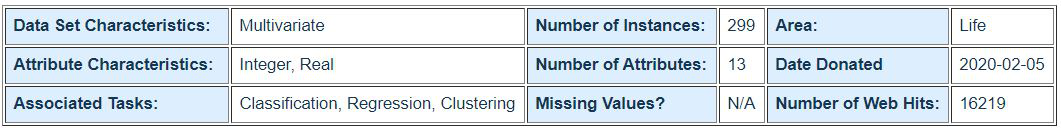

In [237]:
import urllib.request
from PIL import Image


def get_table(url):
  image = Image.open(urllib.request.urlopen(url))
  #image=image.resize((800,100))
  return image


char_image=get_table('https://github.com/ele9996/Heart-failure-clinical-records-analysis/blob/master/report_images/dataset_characteristics.JPG?raw=true')
char_image


The dataset is composed by 13 total features.
The first 12 represent the real features on which the analysis is based while the last one (DEATH_EVENT) represents the target variable.

The table below provides a description of every feature in the dataset. 
Also other information like the unit of measurement and the range to which each feature belongs are given.



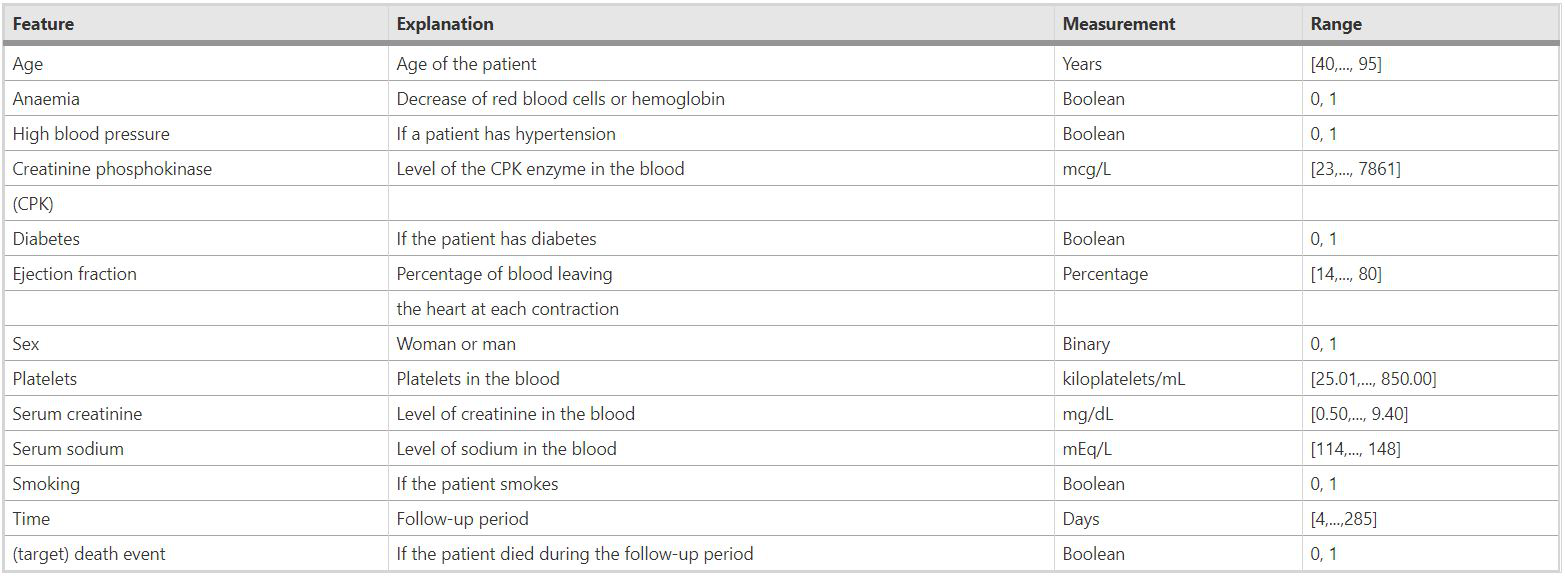

In [238]:
descr_image=get_table('https://github.com/ele9996/Heart-failure-clinical-records-analysis/blob/master/report_images/feature_description.JPG?raw=true')
descr_image

#Dataset visualization and data exploration


In the following table a visualization of the data is provided.


In [194]:
#Dataset import and graphical visualization
df = pd.read_csv('https://raw.githubusercontent.com/ele9996/Heart-failure-clinical-records-analysis/master/heart_failure_clinical_records_dataset.csv')
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


After fouther analysis it is possible to notice the presence of both categorical features and numerical features.

The categorical features are: 


*   anaemia
*   diabetes
*   high_blood_pressure
*   sex
*   smoking
*   DEATH_EVENT(target variable)


The numerical features are:


*   age
*   creatinine_phosphokinase
*   ejection_fraction
*   platelets
*   serum_creatinine
*   serum_sodium
*   time


Since the target variable is categorical, the problem is binary and so an analysis based on binary classification will be performed.

##Null entries check
The dataset description says that there are no null enries, let's check

In [164]:
df.isnull().values.any()

False

##Correlation study
I check the correlation between attributes in order to try to eliminate one of the two having high correlation between each other

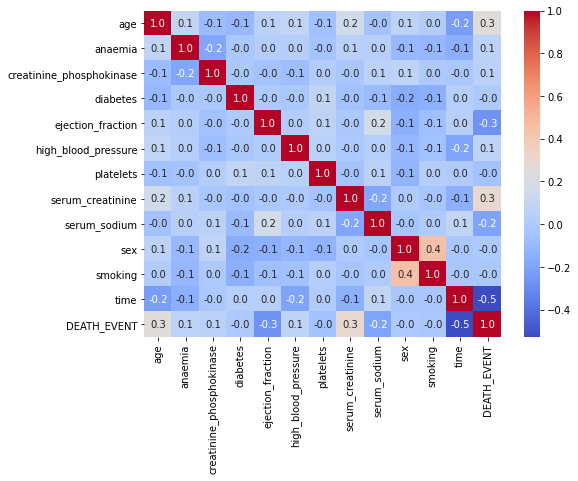

In [165]:
#I calculate correlation and print the correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(corr, annot=True, fmt=".1f", ax=ax,cmap='coolwarm')
#I notice that that there are no attibutes that are highly correlated one with another so selecting features by imposing a threshold on the correlation seems not to be a good idea


##Data preparation

In [166]:
features = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']
numerical_features=[features[0],features[2],features[4],features[6],features[7],features[8],features[11]]
categorical_features=[features[1],features[3],features[5],features[9],features[10]]

#Taking the features and placing in an array
x = df.loc[:, features].values
x_numerical=df.loc[:,numerical_features].values
x_categorical=df.loc[:,categorical_features].values

#Separating the target
y = df.loc[:,['DEATH_EVENT']].values#



x_Df = pd.DataFrame(data = x, columns = features)
x_numerical_Df = pd.DataFrame(data = x_numerical, columns = numerical_features)
x_categorical_Df = pd.DataFrame(data = x_categorical, columns = categorical_features)
y_df=pd.DataFrame(data = y, columns = ['DEATH_EVENT'])





#Features distribution visulization
$\sqrt{3x-1}+(1+x)^2$

###Numerical features

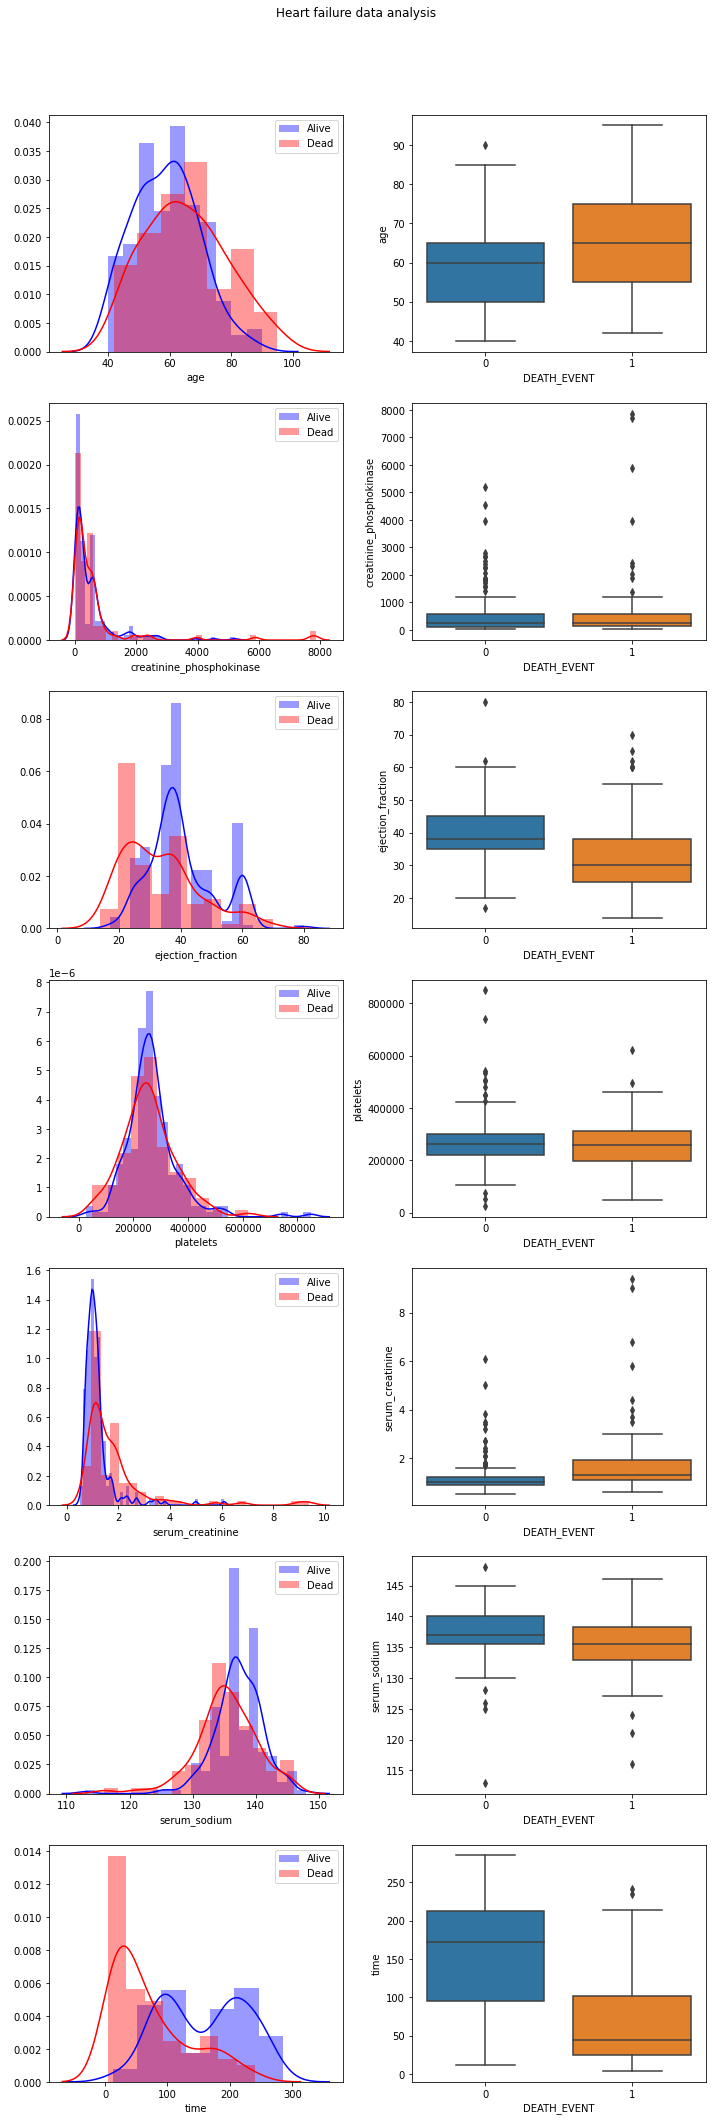

In [167]:
#Visualizing the selected features

fig = plt.figure(figsize = (10, 50))
j = 0
for i in x_numerical_Df.columns:
    plt.subplot(12, 2, j+1)
    j += 1
    
    sns.distplot(x_numerical_Df[i][df['DEATH_EVENT']==0], color='b', label = 'Alive')
    sns.distplot(x_numerical_Df[i][df['DEATH_EVENT']==1], color='r', label = 'Dead')
    plt.legend(loc='best')
    plt.legend(loc='best')
    plt.subplot(12, 2, j+1)
    j += 1
    sns.boxplot(x='DEATH_EVENT', y=x_numerical_Df[i], data=df)

fig.suptitle('Heart failure data analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

###Categorical features

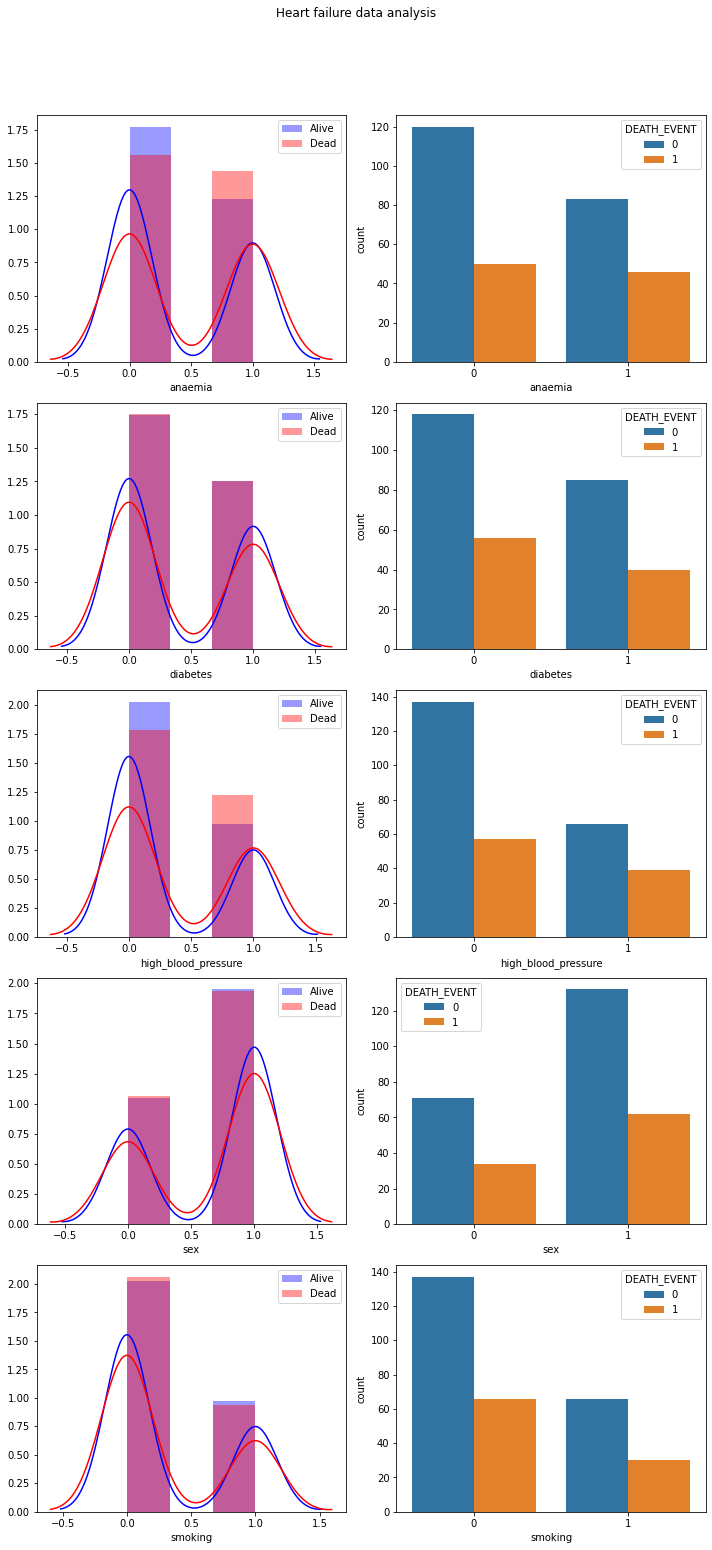

In [193]:
fig = plt.figure(figsize = (10, 50))
j = 0
for i in x_categorical_Df.columns:
    plt.subplot(12, 2, j+1)
    j += 1
    
    sns.distplot(x_categorical_Df[i][df['DEATH_EVENT']==0], color='b', label = 'Alive')
    sns.distplot(x_categorical_Df[i][df['DEATH_EVENT']==1], color='r', label = 'Dead')
    plt.legend(loc='best')
    plt.legend(loc='best')
    plt.subplot(12, 2, j+1)
    j += 1
    sns.countplot(x = x_categorical_Df[i], hue = 'DEATH_EVENT', data = df)

fig.suptitle('Heart failure data analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

#Verify if label distribution is balanced

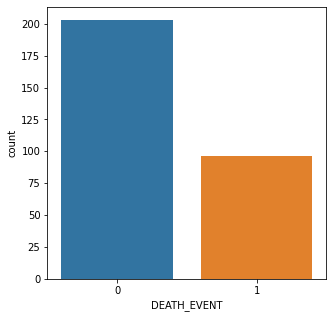

In [169]:
fig = plt.figure(figsize = (5, 5))
sns.countplot(x = 'DEATH_EVENT', data = df)
#inserire grafico a torta

#Data standardization

In [170]:
# Standardizing the features (total, numerical and categorical)
x = StandardScaler().fit_transform(x)

totalDf = pd.concat([x_Df, y_df], axis = 1)

totalDf


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0.0,61.0,1.0,38.0,1.0,155000.00,1.1,143.0,1.0,1.0,270.0,0
295,55.0,0.0,1820.0,0.0,38.0,0.0,270000.00,1.2,139.0,0.0,0.0,271.0,0
296,45.0,0.0,2060.0,1.0,60.0,0.0,742000.00,0.8,138.0,0.0,0.0,278.0,0
297,45.0,0.0,2413.0,0.0,38.0,0.0,140000.00,1.4,140.0,1.0,1.0,280.0,0


#Define some useful function for smote

In [171]:
def nearest_neighbour(X, x):
    euclidean = np.ones(X.shape[0]-1)
    
    additive = [None]*(1*X.shape[1])
    additive = np.array(additive).reshape(1, X.shape[1])
    k = 0
    for j in range(0,X.shape[0]):
        if np.array_equal(X[j], x) == False:
            euclidean[k] = sqrt(sum((X[j]-x)**2))
            k = k + 1
    euclidean = np.sort(euclidean)
    weight = rand.random()
    while(weight == 0):
        weight = rand.random()
    additive = np.multiply(euclidean[:1],weight)
    return additive
    
def SMOTE_100(X):
    new = [None]*(X.shape[0]*X.shape[1])
    new = np.array(new).reshape(X.shape[0],X.shape[1])
    k = 0
    for i in range(0,X.shape[0]):
        additive = nearest_neighbour(X, X[i])
        for j in range(0,1):
            new[k] = X[i] + additive[j]
            k = k + 1
    return new 

#Data preparation
In all classifiers I will use k-fold cross validation in order to increase the performances and reduce overfitting
I divide the dataset into training set (80%) and test set (20%)

In [172]:
x_train_noPca, x_test_noPca, y_train_noPca, y_test_noPca = train_test_split(x, y, test_size = 0.2)

x_train_Df = pd.DataFrame(data = x_train_noPca, columns = features)
y_train_Df =pd.DataFrame(data=y_train_noPca, columns= ["DEATH_EVENT"])


trainDf = pd.concat([x_train_Df, y_train_Df], axis = 1)



#Standard validation

In [173]:
x_train_noPca, x_val_noPca, y_train_noPca, y_val_noPca = train_test_split(x_train_noPca,y_train_noPca,test_size= 0.2 )


##Classifiers evaluation on original dataset

###Linear SVM

In [174]:
C_best=0
acc_best=0

for C in [0.001, 0.01, 0.1, 1, 10, 100,1000]:
  
  print("analyzing C={}".format(C))
  
  
  
  clf=svm.SVC(kernel='linear', C=C)
  clf.fit(x_train_noPca,y_train_noPca.ravel()) #fit is used to train your pattern with some training data

  #evaluate the method on the validation set 

  y_p_SVM=clf.predict(x_val_noPca)
  accuracy= accuracy_score(y_val_noPca,y_p_SVM)
  
    
  #get the mean of the accuracies for each fold
  print("accuracy of the model:",accuracy)
  

  #searching for the best hyperparameter in the fold
  if (accuracy>acc_best):
    C_best=C
    acc_best=accuracy
    bestModel=clf


print("\n")
print("Best hyperparameter for the model is C={}".format(C_best)) 

#Testing the model on the test set with the best hyperparameters
print("Testing the model on the test set with the best hyperparameter")
y_onTest_SVM=bestModel.predict(x_test_noPca)

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_SVM)
precision_on_Test = precision_score(y_test_noPca, y_onTest_SVM, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_SVM, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_SVM, average='macro')
print("Accuracy on test set={}".format(acc_on_Test))
print("Precision on test set={}".format(precision_on_Test))
print("Recall on test set={}".format(recall_on_Test)) 
print("F1 score on test set={}".format(f1_on_Test))

acc_original[0]=acc_on_Test
f1_original[0]=f1_on_Test

analyzing C=0.001
accuracy of the model: 0.6666666666666666
analyzing C=0.01
accuracy of the model: 0.7083333333333334
analyzing C=0.1
accuracy of the model: 0.7083333333333334
analyzing C=1
accuracy of the model: 0.7083333333333334
analyzing C=10
accuracy of the model: 0.7083333333333334
analyzing C=100
accuracy of the model: 0.7083333333333334
analyzing C=1000
accuracy of the model: 0.7083333333333334


Best hyperparameter for the model is C=0.01
Testing the model on the test set with the best hyperparameter
Accuracy on test set=0.65
Precision on test set=0.6964285714285714
Recall on test set=0.5517038777908343
F1 score on test set=0.4982078853046595


###RBF Kernel SVM
In order to try to increase the overall accuracy I try to apply the kernel trick.

In [175]:
C_best=0
acc_best=0

for C in [0.001, 0.01, 0.1, 1, 10, 100,1000]:
  
  print("analyzing C={}".format(C))
  
  
  clf=svm.SVC(kernel='rbf', C=C)
  clf.fit(x_train_noPca,y_train_noPca.ravel()) #fit is used to train your pattern with some training data

  #evaluate the method on the validation set 

  y_p_SVM=clf.predict(x_val_noPca)
  accuracy= accuracy_score(y_val_noPca,y_p_SVM)
  

  #get the mean of the accuracies for each fold
  print("total accuracy of the model is:",accuracy)
  

  #searching for the best hyperparameter in the fold
  if (accuracy>acc_best):
    C_best=C
    acc_best=accuracy
    bestModel=clf


print("\n")
print("Best hyperparameter for the model is C={}".format(C_best)) 

#Testing the model on the test set with the best hyperparameters
print("Testing the model on the test set with the best hyperparameter")
y_onTest_SVMRBF=bestModel.predict(x_test_noPca)
precision_on_Test = precision_score(y_test_noPca, y_onTest_SVMRBF, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_SVMRBF, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_SVMRBF, average='macro')

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_SVMRBF)
print("Accuracy on test set={}".format(acc_on_Test))
print("Precision on test set={}".format(precision_on_Test))
print("Recall on test set={}".format(recall_on_Test)) 
print("F1 score on test set={}".format(f1_on_Test))
acc_original[1]=acc_on_Test
f1_original[1]=f1_on_Test

analyzing C=0.001
total accuracy of the model is: 0.6666666666666666
analyzing C=0.01
total accuracy of the model is: 0.6666666666666666
analyzing C=0.1
total accuracy of the model is: 0.6666666666666666
analyzing C=1
total accuracy of the model is: 0.75
analyzing C=10
total accuracy of the model is: 0.6666666666666666
analyzing C=100
total accuracy of the model is: 0.6666666666666666
analyzing C=1000
total accuracy of the model is: 0.6666666666666666


Best hyperparameter for the model is C=1
Testing the model on the test set with the best hyperparameter
Accuracy on test set=0.75
Precision on test set=0.7420634920634921
Recall on test set=0.7150411280846063
F1 score on test set=0.7221364618709478


###Logistic regression 

In [176]:
clf = LogisticRegression(random_state=0).fit(x_train_noPca,y_train_noPca.ravel())
y_p_LR=clf.predict(x_val_noPca)
accuracy= accuracy_score(y_val_noPca,y_p_LR)
#get the mean of the accuracies for each fold
print("total accuracy of the model:",accuracy)      

y_onTest_LR=clf.predict(x_test_noPca)

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_LR)
precision_on_Test = precision_score(y_test_noPca, y_onTest_LR, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_LR, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_LR, average='macro')
print("Accuracy on test set={}".format(acc_on_Test))
print("Precision on test set={}".format(precision_on_Test))
print("Recall on test set={}".format(recall_on_Test)) 
print("F1 score on test set={}".format(f1_on_Test))
acc_original[2]=acc_on_Test
f1_original[2]=f1_on_Test


total accuracy of the model: 0.75
Accuracy on test set=0.7833333333333333
Precision on test set=0.775
Recall on test set=0.7585193889541716
F1 score on test set=0.7644216248867413


###Random forest

In [177]:
clf = RandomForestClassifier(max_depth=10, random_state=0).fit(x_train_noPca,y_train_noPca.ravel())
y_p_RF=clf.predict(x_val_noPca)

acc= accuracy_score(y_val_noPca,y_p_RF)

#get the mean of the accuracies for each fold
print("total accuracy of the model is:",acc)      

y_onTest_RF=clf.predict(x_test_noPca)

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_RF)
precision_on_Test = precision_score(y_test_noPca, y_onTest_RF, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_RF, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_RF, average='macro')
print("Accuracy on test set={}".format(acc_on_Test))
print("Precision on test set={}".format(precision_on_Test))
print("Recall on test set={}".format(recall_on_Test)) 
print("F1 score on test set={}".format(f1_on_Test))
acc_original[3]=acc_on_Test
f1_original[3]=f1_on_Test


total accuracy of the model is: 0.7916666666666666
Accuracy on test set=0.85
Precision on test set=0.8402777777777777
Recall on test set=0.8454759106933021
F1 score on test set=0.8426114835324978


##Classifiers with smote oversampling tecnique

###Linear SVM

In [178]:
C_best=0
acc_best=0

for C in [0.001, 0.01, 0.1, 1, 10, 100,1000]:
  
  print("analyzing C={}".format(C))
  
  

  #apply smote
  unique, counts = np.unique(y_train_noPca, return_counts=True)
  minority_shape = dict(zip(unique, counts))[1]
  x1 = np.ones((minority_shape, x_train_noPca.shape[1]))
  k=0
  for i in range(0,x_train_noPca.shape[0]):
      
      if y_train_noPca[i] == 1:
          
          x1[k] = x_train_noPca[i]
          k = k + 1
  sampled_instances = SMOTE_100(x1)
  X_f = np.concatenate((x_train_noPca,sampled_instances), axis = 0)
  y_sampled_instances = np.ones(minority_shape)
  
  y_f = np.concatenate((y_train_noPca.ravel(),y_sampled_instances), axis=0)
  #train the data on the training set
  clf=svm.SVC(kernel='linear', C=C)
  clf.fit(X_f,y_f) #fit is used to train your pattern with some training data

  #evaluate the method on the validation set 

  y_p_SVM=clf.predict(x_val_noPca)
  acc= accuracy_score(y_val_noPca,y_p_SVM)
  
  
  print("total accuracy of the model is:",acc)
  

  #searching for the best hyperparameter in the fold
  if (acc>acc_best):
    C_best=C
    acc_best=acc
    bestModel=clf


print("\n")
print("Best hyperparameter for the model is C={}".format(C_best)) 

#Testing the model on the test set with the best hyperparameters
print("Testing the model on the test set with the best hyperparameter")
y_onTest_SVM=bestModel.predict(x_test_noPca)

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_SVM)
precision_on_Test = precision_score(y_test_noPca, y_onTest_SVM, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_SVM, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_SVM, average='macro')
print("Accuracy on test set with smote={}".format(acc_on_Test))
print("Precision on test set with smote={}".format(precision_on_Test))
print("Recall on test set with smote={}".format(recall_on_Test)) 
print("F1 score on test set with smote={}".format(f1_on_Test))
acc_smote[0]=acc_on_Test
f1_smote[0]=f1_on_Test


analyzing C=0.001
total accuracy of the model is: 0.6666666666666666
analyzing C=0.01
total accuracy of the model is: 0.6666666666666666
analyzing C=0.1
total accuracy of the model is: 0.7291666666666666
analyzing C=1
total accuracy of the model is: 0.6875
analyzing C=10
total accuracy of the model is: 0.7083333333333334
analyzing C=100
total accuracy of the model is: 0.75
analyzing C=1000
total accuracy of the model is: 0.7291666666666666


Best hyperparameter for the model is C=100
Testing the model on the test set with the best hyperparameter
Accuracy on test set with smote=0.7666666666666667
Precision on test set with smote=0.7532314923619272
Recall on test set with smote=0.7532314923619272
F1 score on test set with smote=0.7532314923619272


###RBF Kernel SVM

In [179]:
C_best=0
acc_best=0

for C in [0.001, 0.01, 0.1, 1, 10, 100,1000]:
  
  print("analyzing C={}".format(C))
  
  #apply smote
  unique, counts = np.unique(y_train_noPca, return_counts=True)
  minority_shape = dict(zip(unique, counts))[1]
  x1 = np.ones((minority_shape, x_train_noPca.shape[1]))
  k=0
  for i in range(0,x_train_noPca.shape[0]):
      
      if y_train_noPca[i] == 1:
        x1[k] = x_train_noPca[i]
        k = k + 1
  sampled_instances = SMOTE_100(x1)
  X_f = np.concatenate((x_train_noPca,sampled_instances), axis = 0)
  y_sampled_instances = np.ones(minority_shape)
  y_f = np.concatenate((y_train_noPca.ravel(),y_sampled_instances), axis=0)



  #train the data on the training set
  clf=svm.SVC(kernel='rbf', C=C)
  clf.fit(X_f,y_f) #fit is used to train your pattern with some training data

  #evaluate the method on the validation set 

  y_p_SVM=clf.predict(x_val_noPca)
  acc= accuracy_score(y_val_noPca,y_p_SVM)
  

  #get the mean of the accuracies for each fold
  print("total accuracy of the model is:",acc)
  

  #searching for the best hyperparameter in the fold
  if (acc>acc_best):
    C_best=C
    acc_best=acc
    bestModel=clf


print("\n")
print("Best hyperparameter for the model is C={}".format(C_best)) 

#Testing the model on the test set with the best hyperparameters
print("Testing the model on the test set with the best hyperparameter")
y_onTest_SVMRBF=bestModel.predict(x_test_noPca)
precision_on_Test = precision_score(y_test_noPca, y_onTest_SVMRBF, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_SVMRBF, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_SVMRBF, average='macro')

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_SVMRBF)
print("Accuracy on test set with smote={}".format(acc_on_Test))
print("Precision on test set with smote={}".format(precision_on_Test))
print("Recall on test set with smote={}".format(recall_on_Test)) 
print("F1 score on test set with smote={}".format(f1_on_Test))
acc_smote[1]=acc_on_Test
f1_smote[1]=f1_on_Test

analyzing C=0.001
total accuracy of the model is: 0.6666666666666666
analyzing C=0.01
total accuracy of the model is: 0.6666666666666666
analyzing C=0.1
total accuracy of the model is: 0.6666666666666666
analyzing C=1
total accuracy of the model is: 0.7708333333333334
analyzing C=10
total accuracy of the model is: 0.7291666666666666
analyzing C=100
total accuracy of the model is: 0.6458333333333334
analyzing C=1000
total accuracy of the model is: 0.6666666666666666


Best hyperparameter for the model is C=1
Testing the model on the test set with the best hyperparameter
Accuracy on test set with smote=0.8
Precision on test set with smote=0.7912087912087912
Recall on test set with smote=0.7802585193889542
F1 score on test set with smote=0.7846889952153109


###Logistic regression

In [180]:

#apply smote
unique, counts = np.unique(y_train_noPca, return_counts=True)
minority_shape = dict(zip(unique, counts))[1]
x1 = np.ones((minority_shape, x_train_noPca.shape[1]))
k=0
for i in range(0,x_train_noPca.shape[0]):
    
    if y_train_noPca[i] == 1:
        
        x1[k] = x_train_noPca[i]
        k = k + 1
sampled_instances = SMOTE_100(x1)
X_f = np.concatenate((x_train_noPca,sampled_instances), axis = 0)
y_sampled_instances = np.ones(minority_shape)
y_f = np.concatenate((y_train_noPca.ravel(),y_sampled_instances), axis=0)




clf = LogisticRegression(random_state=0).fit(X_f,y_f)
y_p_LR=clf.predict(x_val_noPca)
acc= accuracy_score(y_val_noPca,y_p_LR)

#get the mean of the accuracies for each fold
print("total accuracy of the model is:",acc)      

y_onTest_LR=clf.predict(x_test_noPca)

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_LR)
precision_on_Test = precision_score(y_test_noPca, y_onTest_LR, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_LR, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_LR, average='macro')
print("Accuracy on test set with smote={}".format(acc_on_Test))
print("Precision on test set= with smote{}".format(precision_on_Test))
print("Recall on test set with smote={}".format(recall_on_Test)) 
print("F1 score on test set with smote={}".format(f1_on_Test))
acc_smote[2]=acc_on_Test
f1_smote[2]=f1_on_Test

total accuracy of the model is: 0.75
Accuracy on test set with smote=0.7666666666666667
Precision on test set= with smote0.7532314923619272
Recall on test set with smote=0.7532314923619272
F1 score on test set with smote=0.7532314923619272


###Random forest

In [181]:
#apply smote
unique, counts = np.unique(y_train_noPca, return_counts=True)
minority_shape = dict(zip(unique, counts))[1]
x1 = np.ones((minority_shape, x_train_noPca.shape[1]))
k=0
for i in range(0,x_train_noPca.shape[0]):
    
    if y_train_noPca[i] == 1:
        
        x1[k] = x_train_noPca[i]
        k = k + 1
sampled_instances = SMOTE_100(x1)
X_f = np.concatenate((x_train_noPca,sampled_instances), axis = 0)
y_sampled_instances = np.ones(minority_shape)
y_f = np.concatenate((y_train_noPca.ravel(),y_sampled_instances), axis=0)


clf = RandomForestClassifier(max_depth=10, random_state=0).fit(X_f,y_f)
y_p_RF=clf.predict(x_val_noPca)


acc= accuracy_score(y_val_noPca,y_p_RF)

#get the mean of the accuracies for each fold
print("total accuracy of the model after Cross Validation is:",acc)      

y_onTest_RF=clf.predict(x_test_noPca)

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_RF)
precision_on_Test = precision_score(y_test_noPca, y_onTest_RF, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_RF, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_RF, average='macro')
print("Accuracy on test set with smote={}".format(acc_on_Test))
print("Precision on test set with smote={}".format(precision_on_Test))
print("Recall on test set with smote={}".format(recall_on_Test)) 
print("F1 score on test set with smote={}".format(f1_on_Test))
acc_smote[3]=acc_on_Test
f1_smote[3]=f1_on_Test

total accuracy of the model after Cross Validation is: 0.8333333333333334
Accuracy on test set with smote=0.7666666666666667
Precision on test set with smote=0.7575757575757576
Recall on test set with smote=0.7696827262044654
F1 score on test set with smote=0.76


#KFold Cross Validation

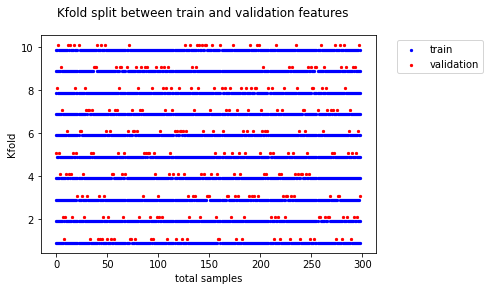

In [182]:
rn = range(0,299)
kf10 = KFold(n_splits=10, shuffle=True)

def kfoldize2(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        train = train.append(train_df)

        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        test = test.append(test_df)
        i += 1
    return train, test


train10, test10 = kfoldize2(kf10,rn)


plt.scatter(x="x",y="val",c="b",label="train",s=5,data=train10)
plt.scatter(x="x",y="val",c="r",label="validation",s=5,data=test10)
plt.ylabel("Kfold")
plt.xlabel("total samples")
plt.suptitle("Kfold split between train and validation features")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

##Classifiers evaluation on original dataset

###Linear SVM

In [183]:
C_best=0
acc_best=0

for C in [0.001, 0.01, 0.1, 1, 10, 100,1000]:
  
  print("analyzing C={}".format(C))
  
  fold = 0
  acc_array_SVM=[0,0,0,0,0,0,0,0,0,0]
  for train_index, test_index in kf10.split(trainDf):
      X_train = trainDf.iloc[train_index].loc[:, features]
      X_val = trainDf.iloc[test_index][features]
      y_train = trainDf.iloc[train_index].loc[:,'DEATH_EVENT']
      y_val = trainDf.loc[test_index]['DEATH_EVENT']

      #linear svm application 
      
      

      #print("Analyzing fold {} ...".format(fold))

    
      #train the data on the training set
      clf=svm.SVC(kernel='linear', C=C)
      clf.fit(X_train,y_train) #fit is used to train your pattern with some training data
    
      #evaluate the method on the validation set 
   
      y_p_SVM=clf.predict(X_val)
      acc_array_SVM[fold]= accuracy_score(y_val,y_p_SVM)
      fold=fold+1
    
  #get the mean of the accuracies for each C
  print("total accuracy of the model after Cross Validation is:",mean(acc_array_SVM) * 100)
  

  #searching for the best hyperparameter
  if (mean(acc_array_SVM)>acc_best):
    C_best=C
    acc_best=mean(acc_array_SVM)
    bestModel=clf


print("\n")
print("Best hyperparameter for the model is C={}".format(C_best)) 

#Testing the model on the test set with the best hyperparameters
print("Testing the model on the test set with the best hyperparameter")
y_onTest_SVM=bestModel.predict(x_test_noPca)

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_SVM)
precision_on_Test = precision_score(y_test_noPca, y_onTest_SVM, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_SVM, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_SVM, average='macro')
print("Accuracy on test set={}".format(acc_on_Test))
print("Precision on test set={}".format(precision_on_Test))
print("Recall on test set={}".format(recall_on_Test)) 
print("F1 score on test set={}".format(f1_on_Test))

acc_original_cv[0]=acc_on_Test
f1_original_cv[0]=f1_on_Test


analyzing C=0.001
total accuracy of the model after Cross Validation is: 69.45652173913042
analyzing C=0.01
total accuracy of the model after Cross Validation is: 75.68840579710145
analyzing C=0.1
total accuracy of the model after Cross Validation is: 82.80797101449275
analyzing C=1
total accuracy of the model after Cross Validation is: 82.3913043478261
analyzing C=10
total accuracy of the model after Cross Validation is: 78.69565217391306
analyzing C=100
total accuracy of the model after Cross Validation is: 81.95652173913042
analyzing C=1000
total accuracy of the model after Cross Validation is: 80.34420289855072


Best hyperparameter for the model is C=0.1
Testing the model on the test set with the best hyperparameter
Accuracy on test set=0.7666666666666667
Precision on test set=0.7660738714090287
Recall on test set=0.7285546415981199
F1 score on test set=0.7375


###RBF Kernel SVM
In order to try to increase the overall accuracy I try to apply the kernel trick.

As before I apply it using cross validation to reduce overfitting

In [184]:
C_best=0
acc_best=0

for C in [0.001, 0.01, 0.1, 1, 10, 100,1000]:
  
  print("analyzing C={}".format(C))
  
  fold = 0
  acc_array_SVM=[0,0,0,0,0,0,0,0,0,0]
  for train_index, test_index in kf10.split(trainDf):
      X_train = trainDf.iloc[train_index].loc[:, features]
      X_val = trainDf.iloc[test_index][features]
      y_train = trainDf.iloc[train_index].loc[:,'DEATH_EVENT']
      y_val = trainDf.loc[test_index]['DEATH_EVENT']

      #linear svm application 
      
      

      #print("Analyzing fold {} ...".format(fold))

    
      #train the data on the training set
      clf=svm.SVC(kernel='rbf', C=C)
      clf.fit(X_train,y_train) #fit is used to train your pattern with some training data
    
      #evaluate the method on the validation set 
   
      y_p_SVM=clf.predict(X_val)
      acc_array_SVM[fold]= accuracy_score(y_val,y_p_SVM)
      fold=fold+1
    
  #get the mean of the accuracies for each fold
  print("total accuracy of the model after Cross Validation is:",mean(acc_array_SVM) * 100)
  

  #searching for the best hyperparameter in the fold
  if (mean(acc_array_SVM)>acc_best):
    C_best=C
    acc_best=mean(acc_array_SVM)
    bestModel=clf


print("\n")
print("Best hyperparameter for the model is C={}".format(C_best)) 

#Testing the model on the test set with the best hyperparameters
print("Testing the model on the test set with the best hyperparameter")
y_onTest_SVMRBF=bestModel.predict(x_test_noPca)
precision_on_Test = precision_score(y_test_noPca, y_onTest_SVMRBF, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_SVMRBF, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_SVMRBF, average='macro')

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_SVMRBF)
print("Accuracy on test set={}".format(acc_on_Test))
print("Precision on test set={}".format(precision_on_Test))
print("Recall on test set={}".format(recall_on_Test)) 
print("F1 score on test set={}".format(f1_on_Test))
acc_original_cv[1]=acc_on_Test
f1_original_cv[1]=f1_on_Test

analyzing C=0.001
total accuracy of the model after Cross Validation is: 69.47463768115942
analyzing C=0.01
total accuracy of the model after Cross Validation is: 69.36594202898551
analyzing C=0.1
total accuracy of the model after Cross Validation is: 69.43840579710145
analyzing C=1
total accuracy of the model after Cross Validation is: 79.90942028985508
analyzing C=10
total accuracy of the model after Cross Validation is: 71.15942028985506
analyzing C=100
total accuracy of the model after Cross Validation is: 69.05797101449276
analyzing C=1000
total accuracy of the model after Cross Validation is: 70.30797101449275


Best hyperparameter for the model is C=1
Testing the model on the test set with the best hyperparameter
Accuracy on test set=0.7666666666666667
Precision on test set=0.7660738714090287
Recall on test set=0.7285546415981199
F1 score on test set=0.7375


linear SVM model performs better

###Logistic regression 

In [185]:

fold = 0
acc_array_LR=[0,0,0,0,0,0,0,0,0,0]
for train_index, test_index in kf10.split(trainDf):
      X_train = trainDf.iloc[train_index].loc[:, features]
      X_val = trainDf.iloc[test_index][features]
      y_train = trainDf.iloc[train_index].loc[:,'DEATH_EVENT']
      y_val = trainDf.loc[test_index]['DEATH_EVENT']


      clf = LogisticRegression(random_state=0).fit(X_train,y_train)
      y_p_LR=clf.predict(X_val)
      acc_array_LR[fold]= accuracy_score(y_val,y_p_LR)
      fold=fold+1
#get the mean of the accuracies for each fold
print("total accuracy of the model after Cross Validation is:",mean(acc_array_LR) * 100)      

y_onTest_LR=clf.predict(x_test_noPca)

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_LR)
precision_on_Test = precision_score(y_test_noPca, y_onTest_LR, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_LR, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_LR, average='macro')
print("Accuracy on test set={}".format(acc_on_Test))
print("Precision on test set={}".format(precision_on_Test))
print("Recall on test set={}".format(recall_on_Test)) 
print("F1 score on test set={}".format(f1_on_Test))
acc_original_cv[2]=acc_on_Test
f1_original_cv[2]=f1_on_Test

total accuracy of the model after Cross Validation is: 82.04710144927537
Accuracy on test set=0.8333333333333334
Precision on test set=0.8278388278388278
Recall on test set=0.8155111633372503
F1 score on test set=0.8205741626794258


###Random forest

In [186]:

fold = 0
acc_array_RF=[0,0,0,0,0,0,0,0,0,0]
for train_index, test_index in kf10.split(trainDf):
      X_train = trainDf.iloc[train_index].loc[:, features]
      X_val = trainDf.iloc[test_index][features]
      y_train = trainDf.iloc[train_index].loc[:,'DEATH_EVENT']
      y_val = trainDf.loc[test_index]['DEATH_EVENT']


      clf = RandomForestClassifier(max_depth=10, random_state=0).fit(X_train,y_train)
      y_p_RF=clf.predict(X_val)

      
      acc_array_RF[fold]= accuracy_score(y_val,y_p_RF)
      fold=fold+1
#get the mean of the accuracies for each fold
print("total accuracy of the model after Cross Validation is:",mean(acc_array_RF) * 100)      

y_onTest_RF=clf.predict(x_test_noPca)

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_RF)
precision_on_Test = precision_score(y_test_noPca, y_onTest_RF, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_RF, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_RF, average='macro')
print("Accuracy on test set={}".format(acc_on_Test))
print("Precision on test set={}".format(precision_on_Test))
print("Recall on test set={}".format(recall_on_Test)) 
print("F1 score on test set={}".format(f1_on_Test))
acc_original_cv[3]=acc_on_Test
f1_original_cv[3]=f1_on_Test


total accuracy of the model after Cross Validation is: 82.39130434782608
Accuracy on test set=0.8833333333333333
Precision on test set=0.875
Recall on test set=0.8807285546415982
F1 score on test set=0.877586709414165


##Classifiers with smote oversampling tecnique

###Linear SVM

In [187]:
C_best=0
acc_best=0

for C in [0.001, 0.01, 0.1, 1, 10, 100,1000]:
  
  print("analyzing C={}".format(C))
  
  fold = 0
  acc_array_SVM=[0,0,0,0,0,0,0,0,0,0]
  for train_index, test_index in kf10.split(trainDf):
      X_train = trainDf.iloc[train_index].loc[:, features].values
      X_val = trainDf.iloc[test_index][features].values
      y_train = trainDf.iloc[train_index].loc[:,'DEATH_EVENT'].values
      y_val = trainDf.loc[test_index]['DEATH_EVENT'].values

      #apply smote
      unique, counts = np.unique(y_train, return_counts=True)
      minority_shape = dict(zip(unique, counts))[1]
      x1 = np.ones((minority_shape, X_train.shape[1]))
      k=0
      for i in range(0,X_train.shape[0]):
          
          if y_train[i] == 1:
              
              x1[k] = X_train[i]
              k = k + 1
      sampled_instances = SMOTE_100(x1)
      
      X_f = np.concatenate((X_train,sampled_instances), axis = 0)
      y_sampled_instances = np.ones(minority_shape)
      
      y_f = np.concatenate((y_train,y_sampled_instances), axis=0)
      #train the data on the training set
      clf=svm.SVC(kernel='linear', C=C)
      clf.fit(X_f,y_f) #fit is used to train your pattern with some training data
    
      #evaluate the method on the validation set 
   
      y_p_SVM=clf.predict(X_val)
      acc_array_SVM[fold]= accuracy_score(y_val,y_p_SVM)
      fold=fold+1
    
  #get the mean of the accuracies for each fold
  print("total accuracy of the model after Cross Validation is:",mean(acc_array_SVM) * 100)
  

  #searching for the best hyperparameter in the fold
  if (mean(acc_array_SVM)>acc_best):
    C_best=C
    acc_best=mean(acc_array_SVM)
    bestModel=clf


print("\n")
print("Best hyperparameter for the model is C={}".format(C_best)) 

#Testing the model on the test set with the best hyperparameters
print("Testing the model on the test set with the best hyperparameter")
y_onTest_SVM=bestModel.predict(x_test_noPca)

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_SVM)
precision_on_Test = precision_score(y_test_noPca, y_onTest_SVM, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_SVM, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_SVM, average='macro')
print("Accuracy on test set with smote={}".format(acc_on_Test))
print("Precision on test set with smote={}".format(precision_on_Test))
print("Recall on test set with smote={}".format(recall_on_Test)) 
print("F1 score on test set with smote={}".format(f1_on_Test))

acc_smote_cv[0]=acc_on_Test
f1_smote_cv[0]=f1_on_Test


analyzing C=0.001
total accuracy of the model after Cross Validation is: 70.67028985507247
analyzing C=0.01
total accuracy of the model after Cross Validation is: 77.82608695652173
analyzing C=0.1
total accuracy of the model after Cross Validation is: 81.57608695652175
analyzing C=1
total accuracy of the model after Cross Validation is: 82.42753623188405
analyzing C=10
total accuracy of the model after Cross Validation is: 81.17753623188403
analyzing C=100
total accuracy of the model after Cross Validation is: 82.46376811594203
analyzing C=1000
total accuracy of the model after Cross Validation is: 82.0108695652174


Best hyperparameter for the model is C=100
Testing the model on the test set with the best hyperparameter
Accuracy on test set with smote=0.7333333333333333
Precision on test set with smote=0.717978848413631
Recall on test set with smote=0.717978848413631
F1 score on test set with smote=0.717978848413631


###RBF Kernel SVM

In [188]:
C_best=0
acc_best=0

for C in [0.001, 0.01, 0.1, 1, 10, 100,1000]:
  
  print("analyzing C={}".format(C))
  
  fold = 0
  acc_array_SVM=[0,0,0,0,0,0,0,0,0,0]
  for train_index, test_index in kf10.split(trainDf):
      X_train = trainDf.iloc[train_index].loc[:, features].values
      X_val = trainDf.iloc[test_index][features].values
      y_train = trainDf.iloc[train_index].loc[:,'DEATH_EVENT'].values
      y_val = trainDf.loc[test_index]['DEATH_EVENT'].values

      #apply smote
      unique, counts = np.unique(y_train, return_counts=True)
      minority_shape = dict(zip(unique, counts))[1]
      x1 = np.ones((minority_shape, X_train.shape[1]))
      k=0
      for i in range(0,X_train.shape[0]):
          
          if y_train[i] == 1:
              
              x1[k] = X_train[i]
              k = k + 1
      sampled_instances = SMOTE_100(x1)
      X_f = np.concatenate((X_train,sampled_instances), axis = 0)
      y_sampled_instances = np.ones(minority_shape)
      y_f = np.concatenate((y_train,y_sampled_instances), axis=0)
    

    
      #train the data on the training set
      clf=svm.SVC(kernel='rbf', C=C)
      clf.fit(X_f,y_f) #fit is used to train your pattern with some training data
    
      #evaluate the method on the validation set 
   
      y_p_SVM=clf.predict(X_val)
      acc_array_SVM[fold]= accuracy_score(y_val,y_p_SVM)
      fold=fold+1
    
  #get the mean of the accuracies for each fold
  print("total accuracy of the model after Cross Validation is:",mean(acc_array_SVM) * 100)
  

  #searching for the best hyperparameter in the fold
  if (mean(acc_array_SVM)>acc_best):
    C_best=C
    acc_best=mean(acc_array_SVM)
    bestModel=clf


print("\n")
print("Best hyperparameter for the model is C={}".format(C_best)) 

#Testing the model on the test set with the best hyperparameters
print("Testing the model on the test set with the best hyperparameter")
y_onTest_SVMRBF=bestModel.predict(x_test_noPca)
precision_on_Test = precision_score(y_test_noPca, y_onTest_SVMRBF, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_SVMRBF, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_SVMRBF, average='macro')

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_SVMRBF)
print("Accuracy on test set with smote={}".format(acc_on_Test))
print("Precision on test set with smote={}".format(precision_on_Test))
print("Recall on test set with smote={}".format(recall_on_Test)) 
print("F1 score on test set with smote={}".format(f1_on_Test))

acc_smote_cv[1]=acc_on_Test
f1_smote_cv[1]=f1_on_Test

analyzing C=0.001
total accuracy of the model after Cross Validation is: 69.47463768115941
analyzing C=0.01
total accuracy of the model after Cross Validation is: 69.45652173913042
analyzing C=0.1
total accuracy of the model after Cross Validation is: 76.17753623188406
analyzing C=1
total accuracy of the model after Cross Validation is: 80.32608695652173
analyzing C=10
total accuracy of the model after Cross Validation is: 73.18840579710145
analyzing C=100
total accuracy of the model after Cross Validation is: 72.37318840579711
analyzing C=1000
total accuracy of the model after Cross Validation is: 70.70652173913045


Best hyperparameter for the model is C=1
Testing the model on the test set with the best hyperparameter
Accuracy on test set with smote=0.8
Precision on test set with smote=0.7885714285714285
Recall on test set with smote=0.7967097532314924
F1 score on test set with smote=0.7916666666666666


###Logistic regression

In [189]:
fold = 0
acc_array_LR=[0,0,0,0,0,0,0,0,0,0]
for train_index, test_index in kf10.split(trainDf):
      X_train = trainDf.iloc[train_index].loc[:, features].values
      X_val = trainDf.iloc[test_index][features].values
      y_train = trainDf.iloc[train_index].loc[:,'DEATH_EVENT'].values
      y_val = trainDf.loc[test_index]['DEATH_EVENT'].values

      #apply smote
      unique, counts = np.unique(y_train, return_counts=True)
      minority_shape = dict(zip(unique, counts))[1]
      x1 = np.ones((minority_shape, X_train.shape[1]))
      k=0
      for i in range(0,X_train.shape[0]):
          
          if y_train[i] == 1:
              
              x1[k] = X_train[i]
              k = k + 1
      sampled_instances = SMOTE_100(x1)
      X_f = np.concatenate((X_train,sampled_instances), axis = 0)
      y_sampled_instances = np.ones(minority_shape)
      y_f = np.concatenate((y_train,y_sampled_instances), axis=0)




      clf = LogisticRegression(random_state=0).fit(X_f,y_f)
      y_p_LR=clf.predict(X_val)
      acc_array_LR[fold]= accuracy_score(y_val,y_p_LR)
      fold=fold+1
#get the mean of the accuracies for each fold
print("total accuracy of the model after Cross Validation is:",mean(acc_array_LR) * 100)      

y_onTest_LR=clf.predict(x_test_noPca)

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_LR)
precision_on_Test = precision_score(y_test_noPca, y_onTest_LR, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_LR, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_LR, average='macro')
print("Accuracy on test set with smote={}".format(acc_on_Test))
print("Precision on test set= with smote{}".format(precision_on_Test))
print("Recall on test set with smote={}".format(recall_on_Test)) 
print("F1 score on test set with smote={}".format(f1_on_Test))
acc_smote_cv[2]=acc_on_Test
f1_smote_cv[2]=f1_on_Test

total accuracy of the model after Cross Validation is: 81.6304347826087
Accuracy on test set with smote=0.75
Precision on test set= with smote0.7361111111111112
Recall on test set with smote=0.7397179788484136
F1 score on test set with smote=0.7376858058874964


###Random forest

In [190]:
fold = 0
acc_array_RF=[0,0,0,0,0,0,0,0,0,0]
for train_index, test_index in kf10.split(trainDf):
      X_train = trainDf.iloc[train_index].loc[:, features].values
      X_val = trainDf.iloc[test_index][features].values
      y_train = trainDf.iloc[train_index].loc[:,'DEATH_EVENT'].values
      y_val = trainDf.loc[test_index]['DEATH_EVENT'].values


      #apply smote
      unique, counts = np.unique(y_train, return_counts=True)
      minority_shape = dict(zip(unique, counts))[1]
      x1 = np.ones((minority_shape, X_train.shape[1]))
      k=0
      for i in range(0,X_train.shape[0]):
          
          if y_train[i] == 1:
              
              x1[k] = X_train[i]
              k = k + 1
      sampled_instances = SMOTE_100(x1)
      X_f = np.concatenate((X_train,sampled_instances), axis = 0)
      y_sampled_instances = np.ones(minority_shape)
      y_f = np.concatenate((y_train,y_sampled_instances), axis=0)


      clf = RandomForestClassifier(max_depth=10, random_state=0).fit(X_f,y_f)
      y_p_RF=clf.predict(X_val)

      
      acc_array_RF[fold]= accuracy_score(y_val,y_p_RF)
      fold=fold+1
#get the mean of the accuracies for each fold
print("total accuracy of the model after Cross Validation is:",mean(acc_array_RF) * 100)      

y_onTest_RF=clf.predict(x_test_noPca)

acc_on_Test= accuracy_score(y_test_noPca,y_onTest_RF)
precision_on_Test = precision_score(y_test_noPca, y_onTest_RF, average='macro')
recall_on_Test=recall_score(y_test_noPca, y_onTest_RF, average='macro')
f1_on_Test=f1_score(y_test_noPca, y_onTest_RF, average='macro')
print("Accuracy on test set with smote={}".format(acc_on_Test))
print("Precision on test set with smote={}".format(precision_on_Test))
print("Recall on test set with smote={}".format(recall_on_Test)) 
print("F1 score on test set with smote={}".format(f1_on_Test))

acc_smote_cv[3]=acc_on_Test
f1_smote_cv[3]=f1_on_Test

total accuracy of the model after Cross Validation is: 82.42753623188406
Accuracy on test set with smote=0.8166666666666667
Precision on test set with smote=0.8055555555555556
Recall on test set with smote=0.8102232667450059
F1 score on test set with smote=0.8076362576508307


#Results

In [191]:



result_Table =pd.DataFrame({'model': ['Linear SVM', 'RBF Kernel SVM','Logistic Regression','Random Forest'], 'Holdout Original Accuracy': acc_original, 'Holdout Original F1': f1_original, 'Holdout SMOTE Accuracy': acc_smote, 'Holdout SMOTE F1': f1_smote, 'Holdout Original CV Accuracy':acc_original_cv, 'Holdout Original CV F1': f1_original_cv, 'Holdout SMOTE CV Accuracy': acc_smote_cv,'Holdout SMOTE CV F1': f1_smote_cv})
result_Table

,model,Holdout Original Accuracy,Holdout Original F1,Holdout SMOTE Accuracy,Holdout SMOTE F1,Holdout Original CV Accuracy,Holdout Original CV F1,Holdout SMOTE CV Accuracy,Holdout SMOTE CV F1
0,Linear SVM,0.650000,0.498208,0.766667,0.753231,0.766667,0.737500,0.733333,0.717979
1,RBF Kernel SVM,0.750000,0.722136,0.800000,0.784689,0.766667,0.737500,0.800000,0.791667
2,Logistic Regression,0.783333,0.764422,0.766667,0.753231,0.833333,0.820574,0.750000,0.737686
3,Random Forest,0.850000,0.842611,0.766667,0.760000,0.883333,0.877587,0.816667,0.807636
